<a href="https://colab.research.google.com/github/Juliana-Lis/Projetos/blob/main/Analisando_os_Dados_do_Airbnb_Sui%C3%A7a_Zurique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Zurique*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

A empresa deu teve seu início quando dois anfitriões receberam três hóspedes em sua casa em São Francisco, **em 2007**. Mantendo sua ideia inicial de que os anfitriões possam oferecer acomodações e experiências únicas, ate hoje vem possibilitando aos hóspedes vivenciar experiências em suas hospedagens de uma forma mais autêntica e conectada.

Unindo os interesses dos dois lados, das pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Atualmente o Airbnb possui:
  
  --> **5,6 milhões** de anúncios ativos em todo o mundo *(até 31 de março de 2021)*;

  --> Mais de **220** países e regiões possuem acomodações do Airbnb *(até 30 de junho de 2021)*;

  --> Mais de **4 milhões** de anfitriões no Airbnb *(até 30 de junho de 2021)*.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Toronto, Canadá, e ver quais insights podem ser extraídos a partir de dados brutos.**

# Suíça - *Zurique*

<center><img alt="Toronto" width="100%" src="https://s1.1zoom.me/b4857/998/Zurich_Switzerland_Houses_Rivers_Evening_Bridges_518653_2560x1440.jpg"></center>

Zurique não é a capital da Suíça, mas é a maior cidade do país com uma população praticamente de 400.000 habitantes, além de ser o centro financeiro da Suíça, onde estão localizados a maior parte dos famosos bancos suíços, assim como várias sedes de empresas internacionais.

É uma das melhores cidades do mundo para turismo por oferecer uma organização surpreendente que facilita a vida dos visitantes e uma ampla oferta de atrativos turísticos, além disso fica praticamente na fronteira com a Alemanha.

O trem é o principal meio de transporte, é uma cidade com estações muito bem-definidas. Sendo o inverno é rigoroso comm bastante neve e frio (Dezembro). As temperaturas ficam entre -2°C e -5°C. E no verão (entre Junho e Setembro) a temperatura tem média entre 13°C e 25°C.





## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# importar o arquivo listings.csv para um DataFrame
zur = pd.read_csv('http://data.insideairbnb.com/switzerland/z%C3%BCrich/zurich/2021-10-28/visualisations/listings.csv')


In [3]:
# verificar os dados
zur.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,73282,"Clean, central, quiet",377532,Simona,Kreis 3,Sihlfeld,47.37374,8.51957,Entire home/apt,100,3,49,2019-03-28,0.44,1,0,0,NaN
1,86645,Stadium Letzigrund - by Airhome,475053,James,Kreis 3,Sihlfeld,47.38038,8.50461,Entire home/apt,180,1,50,2021-07-16,0.52,18,0,1,NaN
2,143821,marvelous LOFT in SIHLCITY Zürich,697307,Erhan,Kreis 3,Alt-Wiedikon,47.35724,8.52304,Entire home/apt,200,3,0,NaN,NaN,1,361,0,NaN
3,178448,"a lovely place, top location",854016,Delphine,Kreis 2,Enge,47.36565,8.52753,Private room,60,5,9,2016-05-10,0.13,1,0,0,NaN
4,204586,very nice luxury city apartment,1004816,Aicha,Kreis 10,Höngg,47.40656,8.48465,Private room,200,3,0,NaN,NaN,1,364,0,NaN
5,216395,"city studio, modern meets colonial",1116961,Fabio,Kreis 3,Sihlfeld,47.37880,8.50766,Entire home/apt,203,1,0,NaN,NaN,1,365,0,NaN
6,222565,Bedroom overlooking the lake near,1155866,Ysabel,Kreis 2,Wollishofen,47.33463,8.54117,Private room,69,2,222,2019-06-01,1.90,1,215,1,NaN
7,227039,*Luxury Penthouse in the heart of trendy Zurich*,1184427,Lucas,Kreis 5,Escher Wyss,47.38942,8.51881,Entire home/apt,400,4,28,2019-12-20,0.32,1,358,1,NaN
8,283737,Best Location in Zurich Oldtown,1477771,Nuria,Kreis 1,Rathaus,47.37284,8.54324,Entire home/apt,159,4,265,2021-09-23,2.27,2,193,24,NaN
9,292351,120 sqM - 3 bedrooms + lounge in central Zurich,1513739,Anil,Kreis 3,Sihlfeld,47.37896,8.50787,Entire home/apt,210,5,10,2018-08-08,0.35,1,66,1,NaN


In [4]:
# informações dos dados
zur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1825 non-null   int64  
 1   name                            1824 non-null   object 
 2   host_id                         1825 non-null   int64  
 3   host_name                       1822 non-null   object 
 4   neighbourhood_group             1825 non-null   object 
 5   neighbourhood                   1825 non-null   object 
 6   latitude                        1825 non-null   float64
 7   longitude                       1825 non-null   float64
 8   room_type                       1825 non-null   object 
 9   price                           1825 non-null   int64  
 10  minimum_nights                  1825 non-null   int64  
 11  number_of_reviews               1825 non-null   int64  
 12  last_review                     14

In [5]:
zur.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.825000e+03,1.825000e+03,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1453.000000,1825.000000,1825.000000,1825.000000,0.0
mean,3.099301e+07,9.006629e+07,47.378169,8.532717,171.184658,7.790137,25.877808,1.181968,12.045479,146.247123,4.767671,NaN
std,1.624415e+07,1.174204e+08,0.018356,0.023495,371.298882,23.509477,57.338273,1.662979,23.917590,134.179728,9.995599,NaN
min,7.328200e+04,1.428800e+04,47.330020,8.466530,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.659511e+07,1.288649e+07,47.365080,8.519240,75.000000,1.000000,1.000000,0.210000,1.000000,23.000000,0.000000,NaN
50%,3.416089e+07,2.539617e+07,47.375590,8.532460,109.000000,3.000000,5.000000,0.580000,2.000000,90.000000,1.000000,NaN
75%,4.570166e+07,1.316000e+08,47.388560,8.548330,170.000000,5.000000,22.000000,1.460000,7.000000,293.000000,5.000000,NaN
max,5.302624e+07,4.280545e+08,47.431290,8.604800,9974.000000,365.000000,798.000000,17.050000,91.000000,365.000000,150.000000,NaN


In [6]:
zur.describe(include=np.object)

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,1824,1822,1825,1825,1825,1453
unique,1717,781,12,34,4,684
top,Renovated & Quiet Studio Near City Center & Fo...,Stephanie,Kreis 4,Altstetten,Entire home/apt,2021-10-01
freq,18,93,243,128,1225,25


## Análise dos Dados


**Dicionário das variáveis**

* id = número de identificação do imóvel 
* name = nome da propriedade do imóvel 
* host_id = número de identificação do dono (host) do imóvel
* host_name = nome do proprietário (host) do imóvel
* neighbourhood_group = coluna sem valores válidos
* neighbourhood = bairro do imóvel
* latitude = coordenada geográfica da latitude do imóvel 
* longitude = coordenada geográfica da longitude do imóvel
* room_type = tipo de acomodação do imóvel
* price = preço do aluguel pedido
* minimum_nights = número mínimo de noites para serem alugadas
* number_of_reviews = número de comentários existentes do imóvel
* last_review = última comentário sobre o imóvel
* reviews_per_month = comentários por mês
* calculated_host_listings_count = número de imóveis do mesmo proprietário (host)
*	availability_365 = disponibilidade em 365 dias
*	number_of_reviews_ltm = número de cometários que o mimóvel possui (em 12 meses)
*	license = licença/ número de registro do imóvel

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [7]:
# retirando a coluna license por não possuir valores
zur.pop('license')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1820   NaN
1821   NaN
1822   NaN
1823   NaN
1824   NaN
Name: license, Length: 1825, dtype: float64

In [8]:
# mostrar as 5 primeiras entradas
zur.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,73282,"Clean, central, quiet",377532,Simona,Kreis 3,Sihlfeld,47.37374,8.51957,Entire home/apt,100,3,49,2019-03-28,0.44,1,0,0
1,86645,Stadium Letzigrund - by Airhome,475053,James,Kreis 3,Sihlfeld,47.38038,8.50461,Entire home/apt,180,1,50,2021-07-16,0.52,18,0,1
2,143821,marvelous LOFT in SIHLCITY Zürich,697307,Erhan,Kreis 3,Alt-Wiedikon,47.35724,8.52304,Entire home/apt,200,3,0,NaN,NaN,1,361,0
3,178448,"a lovely place, top location",854016,Delphine,Kreis 2,Enge,47.36565,8.52753,Private room,60,5,9,2016-05-10,0.13,1,0,0
4,204586,very nice luxury city apartment,1004816,Aicha,Kreis 10,Höngg,47.40656,8.48465,Private room,200,3,0,NaN,NaN,1,364,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [83]:
# identificar o volume de dados do DataFrame
print(f'Quantidade de linhas=', zur.shape[0])
print(f'Quantidade de colunas =', zur.shape[1])
# verificar as 5 primeiras entradas do dataset

Quantidade de linhas= 1825
Quantidade de colunas = 17


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [46]:
# quantidade de valores ausentes
zur.isnull().sum()

id                                0
name                              1
host_id                           0
host_name                         3
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [47]:
# ordenar em ordem decrescente as variáveis pela porcentagem dos valores ausentes
(zur.isnull().sum() / zur.shape[0]).sort_values(ascending=False)

host_name                         0.001644
name                              0.000548
number_of_reviews_ltm             0.000000
longitude                         0.000000
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
availability_365                  0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
id                                0.000000
dtype: float64

In [12]:
# preencher os valores ausentes de 'reviews_per_month' e 'last_review' pelas seus valores médios 

# reviews per month
rpm_tor_mean = zur.reviews_per_month.mean()
zur = zur.fillna({"reviews_per_month": rpm_tor_mean})

#last_review
lr_tor_mean = zur['last_review'].astype('datetime64[ns]').quantile(0.5, interpolation="midpoint")
zur = zur.fillna({"last_review": lr_tor_mean})

In [13]:
# conferindo novamente os valores nulos para ver se deu certo
(zur.isnull().sum() / zur.shape[0]).sort_values(ascending=False)

host_name                         0.001644
name                              0.000548
number_of_reviews_ltm             0.000000
longitude                         0.000000
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
availability_365                  0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9a2286ad0>,
      dtype=object)

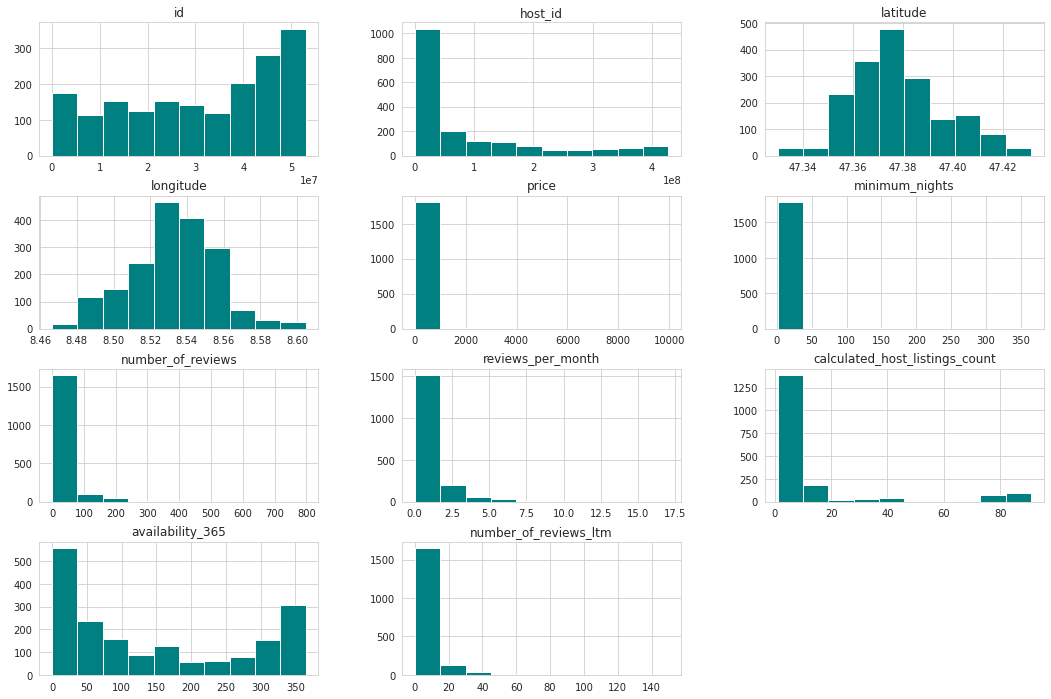

In [14]:
# plotar o histograma das variáveis numéricas
zur.hist(bins = 10, figsize=(18,12), color = "teal")


### **Q4.  Existem outliers?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count` e `number_of_reviews_ltm`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [15]:
# ver resumo estatístico das variáveis com outliers

zur[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,171.184658,7.790137,25.877808,1.181968,12.045479,4.767671
std,371.298882,23.509477,57.338273,1.483740,23.917590,9.995599
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,75.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,109.000000,3.000000,5.000000,0.950000,2.000000,1.000000
75%,170.000000,5.000000,22.000000,1.181968,7.000000,5.000000
max,9974.000000,365.000000,798.000000,17.050000,91.000000,150.000000


Após a análise do resumo estatístico podemos observar que:

* A variável `price` possui 75% do valor abaixo de 170, porém seu valor máximo é 9974.


### Boxplot para price

In [16]:
# definindo os valores para a retirada dos outliers
price= zur['price']
Q1 = price.quantile(.25)
Q3 = price.quantile(.75)
IIQ = Q3 - Q1
limite_inferior_price = Q1 - 1.5 * IIQ
limite_superior_price = Q3 + 1.5 * IIQ

In [17]:
print(limite_inferior_price)
print(limite_superior_price)

-67.5
312.5


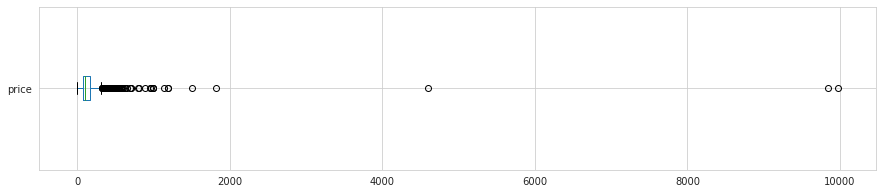


price: valores acima de 312
194 entradas
10.6301%


In [18]:
# price
zur.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 312
print("\nprice: valores acima de 312")
print("{} entradas".format(len(zur[zur.price > 312])))
print("{:.4f}%".format((len(zur[zur.price > 312]) / zur.shape[0]) * 100))

### Boxplot para *minimum_nights*

In [19]:
# definindo os valores para a retirada dos outliers
minimum_nights= zur['minimum_nights']
Q1 = minimum_nights.quantile(.25)
Q3 = minimum_nights.quantile(.75)
IIQ = Q3 - Q1
limite_inferior_nights = Q1 - 1.5 * IIQ
limite_superior_nights = Q3 + 1.5 * IIQ

In [20]:
print(limite_inferior_nights)
print(limite_superior_nights)

-5.0
11.0


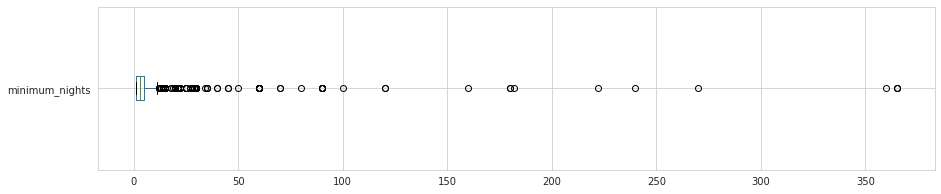


minimum_nights: valores acima de 11
251 entradas
13.7534%


In [21]:
# minimum_nights
zur.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 11
print("\nminimum_nights: valores acima de 11")
print("{} entradas".format(len(zur[zur.minimum_nights > 11])))
print("{:.4f}%".format((len(zur[zur.minimum_nights > 11]) / zur.shape[0]) * 100))

### Boxplot para number_of_reviews

In [22]:
# definindo os valores para a retirada dos outliers
number_of_reviews= zur['number_of_reviews']
Q1 = number_of_reviews.quantile(.25)
Q3 = number_of_reviews.quantile(.75)
IIQ = Q3 - Q1
limite_inferior_reviews = Q1 - 1.5 * IIQ
limite_superior_reviews = Q3 + 1.5 * IIQ

In [23]:
print(limite_inferior_reviews)
print(limite_superior_reviews)

-30.5
53.5


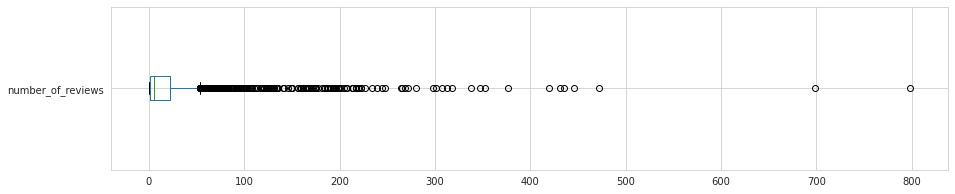


number_of_reviews: valores acima de 53
250 entradas
13.6986%


In [24]:
# number_of_reviews
zur.number_of_reviews.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 53
print("\nnumber_of_reviews: valores acima de 53")
print("{} entradas".format(len(zur[zur.number_of_reviews > 53])))
print("{:.4f}%".format((len(zur[zur.number_of_reviews > 53]) / zur.shape[0]) * 100))

### Boxplot para reviews_per_month

In [25]:
# definindo os valores para a retirada dos outliers
reviews_per_month = zur['reviews_per_month']
Q1 = reviews_per_month.quantile(.25)
Q3 = reviews_per_month.quantile(.75)
IIQ = Q3 - Q1
limite_inferior_reviews_per_month = Q1 - 1.5 * IIQ
limite_superior_reviews_per_month = Q3 + 1.5 * IIQ

print(limite_inferior_reviews_per_month)
print(limite_superior_reviews_per_month)

-1.0729525120440482
2.534920853406747


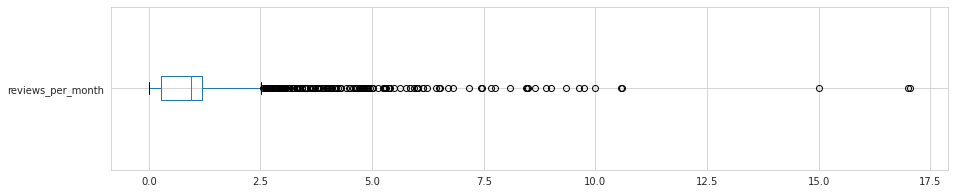


reviews_per_month: valores acima de 2.5
191 entradas
10.4658%


In [26]:
# reviews_per_month
zur.reviews_per_month.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 2.5
print("\nreviews_per_month: valores acima de 2.5")
print("{} entradas".format(len(zur[zur.reviews_per_month > 2.5])))
print("{:.4f}%".format((len(zur[zur.reviews_per_month > 2.5]) / zur.shape[0]) * 100))

### Boxplot para calculated_host_listings_count	

In [27]:
# definindo os valores para a retirada dos outliers
calculated_host_listings_count = zur['calculated_host_listings_count']
Q1 = calculated_host_listings_count.quantile(.25)
Q3 = calculated_host_listings_count.quantile(.75)
IIQ = Q3 - Q1
limite_inferior_host_listings = Q1 - 1.5 * IIQ
limite_superior_host_listings = Q3 + 1.5 * IIQ

print(limite_inferior_host_listings)
print(limite_superior_host_listings)

-8.0
16.0


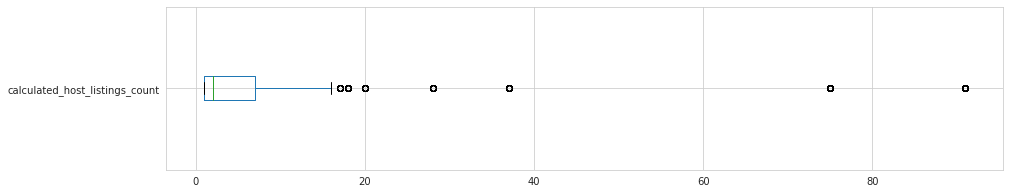


calculated_host_listings_count: valores acima de 16
322 entradas
17.6438%


In [28]:
# calculated_host_listings_count
zur.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 16
print("\ncalculated_host_listings_count: valores acima de 16")
print("{} entradas".format(len(zur[zur.calculated_host_listings_count > 16])))
print("{:.4f}%".format((len(zur[zur.calculated_host_listings_count > 16]) / zur.shape[0]) * 100))

### Boxplot para number_of_reviews_ltm

In [29]:
# definindo os valores para a retirada dos outliers
number_of_reviews_ltm = zur['number_of_reviews_ltm']
Q1 = number_of_reviews_ltm.quantile(.25)
Q3 = number_of_reviews_ltm.quantile(.75)
IIQ = Q3 - Q1
limite_inferior_reviews_12_months = Q1 - 1.5 * IIQ
limite_superior_reviews_12_months = Q3 + 1.5 * IIQ

print(limite_inferior_reviews_12_months)
print(limite_superior_reviews_12_months)

-7.5
12.5


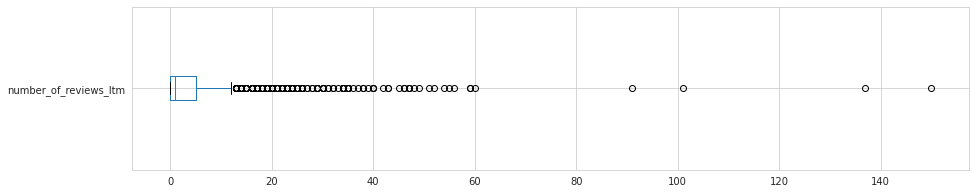


number_of_reviews_ltmt: valores acima de 12.5
220 entradas
12.0548%


In [30]:
# number_of_reviews_ltm
zur.number_of_reviews_ltm.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 12.5
print("\nnumber_of_reviews_ltmt: valores acima de 12.5")
print("{} entradas".format(len(zur[zur.number_of_reviews_ltm > 12.5])))
print("{:.4f}%".format((len(zur[zur.number_of_reviews_ltm > 12.5]) / zur.shape[0]) * 100))

## Histogramas sem *outliers*

Já que identificamos *outliers* e, algumas variáveis, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9a17908d0>,
      dtype=object)

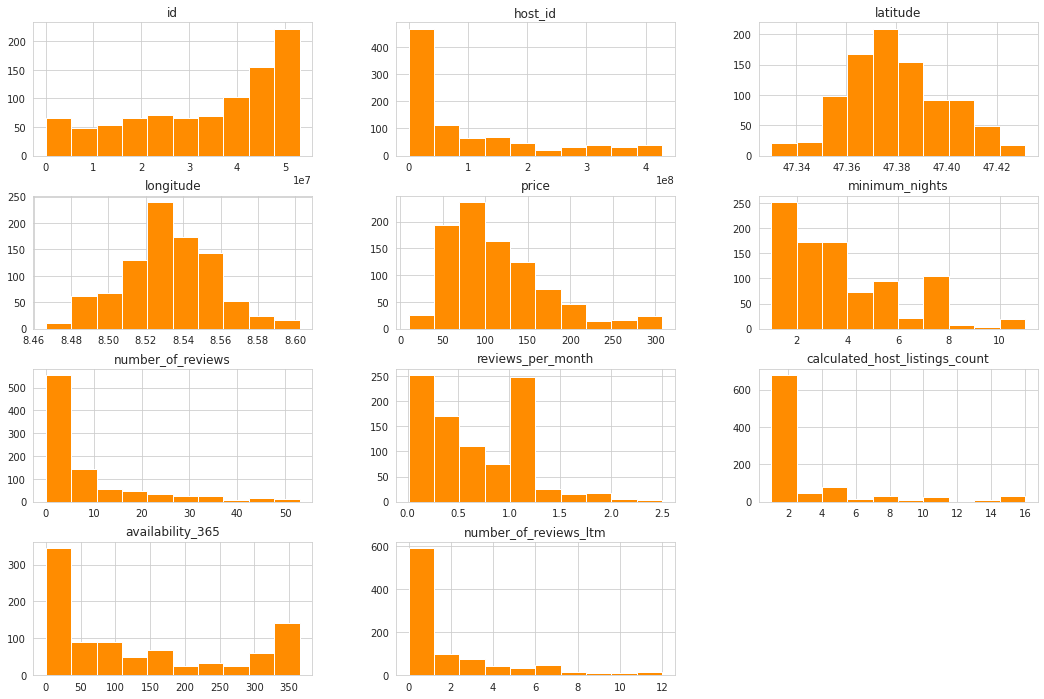

In [31]:
# remover os *outliers* em um novo DataFrame
zur_clean = zur.copy()
zur_clean.drop(zur_clean[zur_clean.price > 312].index, axis=0, inplace=True)
zur_clean.drop(zur_clean[zur_clean.minimum_nights > 11].index, axis=0, inplace=True)
zur_clean.drop(zur_clean[zur_clean.number_of_reviews > 53].index, axis=0, inplace=True)
zur_clean.drop(zur_clean[zur_clean.reviews_per_month > 2.5].index, axis=0, inplace=True)
zur_clean.drop(zur_clean[zur_clean.calculated_host_listings_count > 16].index, axis=0, inplace=True)
zur_clean.drop(zur_clean[zur_clean.number_of_reviews_ltm > 12.5].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
zur_clean.hist(bins = 10, figsize=(18,12), color = "darkorange")

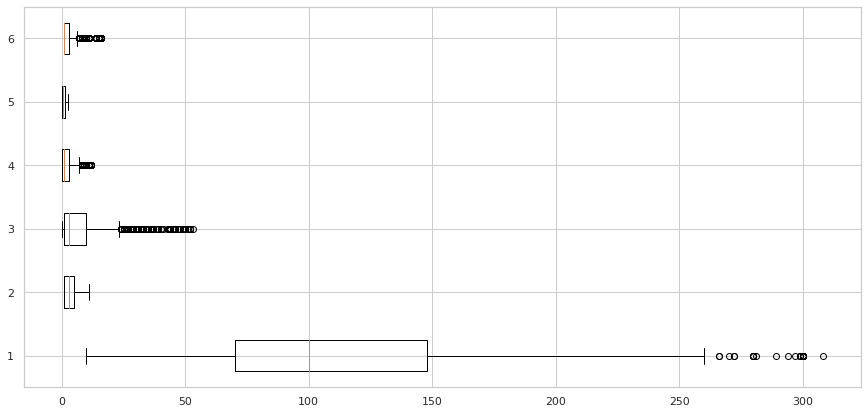

In [49]:
# boxplot após limpeza dos dados

a = zur_clean.price
b = zur_clean.minimum_nights
c= zur_clean.number_of_reviews
d = zur_clean.number_of_reviews_ltm
e = zur_clean.reviews_per_month
f = zur_clean.calculated_host_listings_count
data = [a,b,c,d,e,f]

fig = plt.figure(figsize =(15,7))
plt.boxplot(data, vert=False)
plt.show()

In [82]:
# identificar o volume de dados do DataFrame
print(f'Quantidade de linhas=', zur.shape[0])
print(f'Quantidade de linhas após a limpeza dos dados=', zur_clean.shape[0])
print(f'Quantidade de colunas =', zur.shape[1])
print(f'Quantidade de colunas após a limpeza dos dados =', zur_clean.shape[1])


Quantidade de linhas= 1825
Quantidade de linhas após a limpeza dos dados= 921
Quantidade de colunas = 17
Quantidade de colunas após a limpeza dos dados = 17


### **Q5. Qual a média dos preços de aluguel?**

In [96]:
# ver a média da coluna "price" (resultado em reais)

franco_suico = zur_clean.price.mean()
real = zur_clean.price.mean() * 6.01

print(f'Valor médio de aluguel em Franco Suiço =', franco_suico)
print(f'Valor médio de aluguel em Reais=', real)

Valor médio de aluguel em Franco Suiço = 113.15092290988056
Valor médio de aluguel em Reais= 680.0370466883821


### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [34]:
# criar uma matriz de correlação
corr = zur_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.014465,-0.102524,0.061470,0.010045,0.192355
minimum_nights,-0.014465,1.000000,-0.038672,-0.078211,0.160628,-0.055055
number_of_reviews,-0.102524,-0.038672,1.000000,0.013922,0.079718,0.006032
reviews_per_month,0.061470,-0.078211,0.013922,1.000000,-0.034784,0.046535
calculated_host_listings_count,0.010045,0.160628,0.079718,-0.034784,1.000000,0.201508
availability_365,0.192355,-0.055055,0.006032,0.046535,0.201508,1.000000


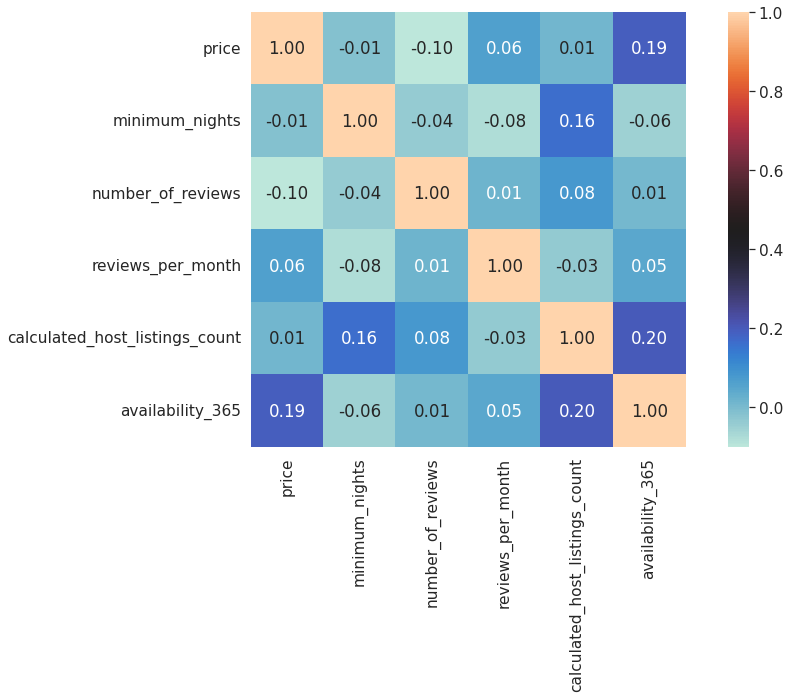

In [35]:
# plotar um heatmap a partir das correlações
plt.figure(figsize = (15,8))
sns.set(font_scale=1.4)
sns.heatmap(corr, cmap='icefire', fmt='.2f', square=True, linecolor='white', annot=True,);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [36]:
# quantidade de imóveis disponíveis
zur_clean.room_type.value_counts().sum()

921

In [37]:
# mostrar a quantidade de cada tipo de imóvel disponível
zur_clean.room_type.value_counts()

Entire home/apt    540
Private room       365
Shared room         14
Hotel room           2
Name: room_type, dtype: int64

In [97]:
# mostrar a porcentagem de cada tipo de imóvel disponível
tipo_imovel = zur_clean.room_type.value_counts() / zur_clean.shape[0] *100
tipo_imovel

Entire home/apt    58.631922
Private room       39.630836
Shared room         1.520087
Hotel room          0.217155
Name: room_type, dtype: float64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

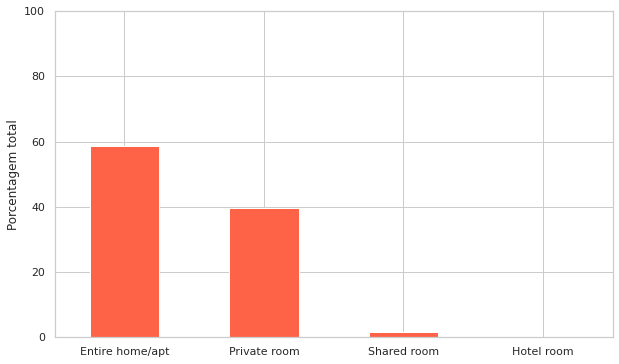

In [98]:
# gráfico dos tipos de imóveis mais alugados

sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
tipo_imovel.plot(kind='bar', ylabel='Porcentagem total', ylim=(00, 100), color='tomato')
plt.xticks(rotation='horizontal')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


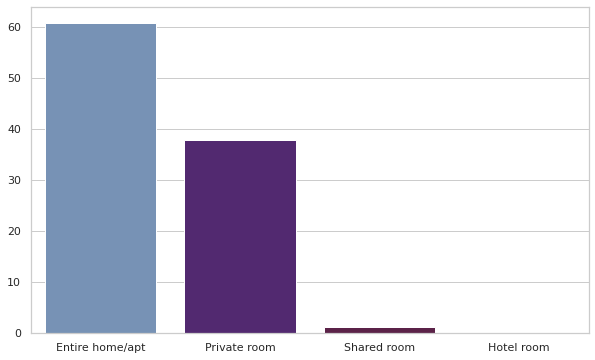

In [99]:
# # gráfico dos tipos de imóveis mais alugados

y = [60.837708, 37.948381, 1.137358,  0.076553]
x= ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']

plt.figure(figsize = (10,6))
sns.set_theme(style="whitegrid")
sns.barplot(x, y, palette = 'twilight', y="Porcentagem")
plt.show()

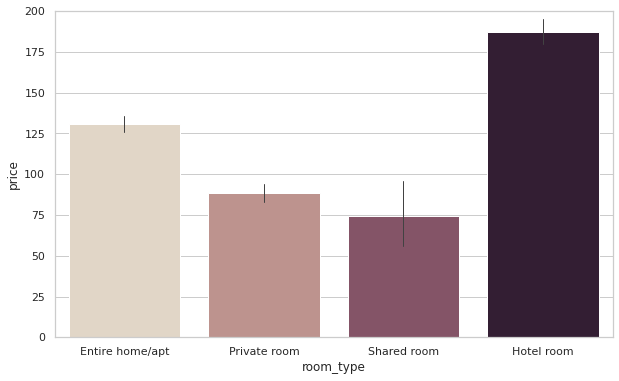

In [41]:
# gráfico dos tipos de imóveis por preço

import matplotlib.pyplot as plt
import pylab as pl

plt.figure(figsize = (10,6))
sns.barplot(x = "room_type", y = "price", data = zur_clean, palette='ch:.25', errwidth = 1)
plt.ylim(0, 200)
plt.show()

In [42]:
# bairro com maior número de imóveis
zur_clean.neighbourhood.value_counts()

Altstetten              67
Langstrasse             66
Oerlikon                62
Sihlfeld                55
Enge                    45
Unterstrass             44
Alt-Wiedikon            43
Seebach                 41
Wipkingen               37
Wollishofen             35
Mühlebach               30
Werd                    29
Gewerbeschule           29
Hottingen               28
Höngg                   28
Hard                    27
Escher Wyss             26
Hirslanden              25
Fluntern                24
Seefeld                 23
Rathaus                 23
Witikon                 16
Albisrieden             16
Oberstrass              16
Affoltern               14
Weinegg                 13
Hirzenbach              12
Friesenberg             12
Schwamendingen-Mitte    12
Lindenhof                8
Hochschulen              7
City                     3
Saatlen                  3
Leimbach                 2
Name: neighbourhood, dtype: int64

### **Q8. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [43]:
bairros = zur_clean.groupby('neighbourhood')  

In [44]:
# ver preços por bairros, na média
medias = zur_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].astype(int)
medias

neighbourhood
City           246
Lindenhof      181
Seefeld        157
Weinegg        141
Saatlen        141
Werd           136
Escher Wyss    135
Fluntern       135
Oberstrass     129
Hirslanden     123
Name: price, dtype: int64

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

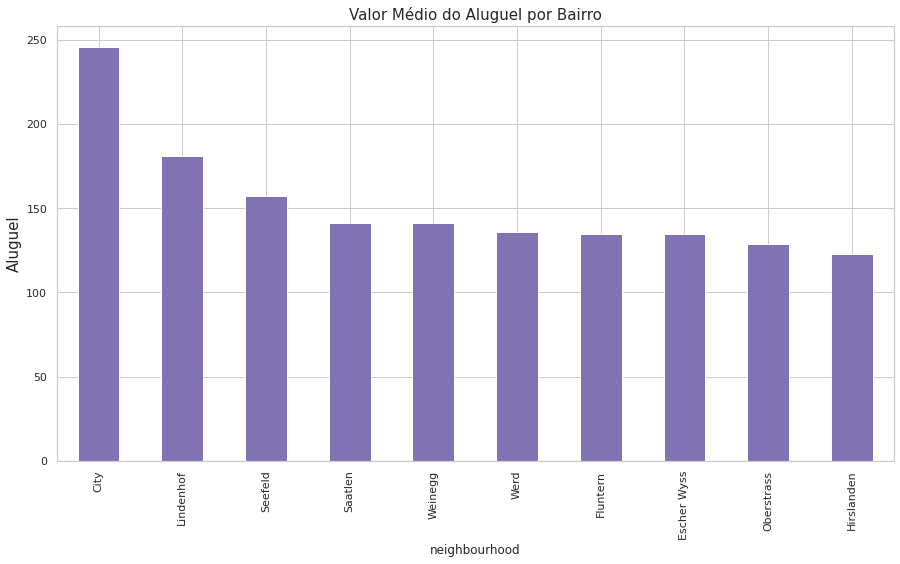

In [53]:
# gráfico dos valores médios de aluguel

plt.rc('figure', figsize = (15,8))

fig = medias.sort_values(ascending=False).plot.bar(color = 'm')
fig.set_ylabel('Aluguel', {'fontsize': 15})
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 15})

In [54]:
# ver a quantidade de inóveis no bairro City 
print(zur_clean[zur_clean.neighbourhood == "City"].shape)

# ver as entradas
zur_clean[zur_clean.neighbourhood == "City"]

(3, 17)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
175,5516912,Apartment,28612441,Helvetia,Kreis 1,City,47.37271,8.53225,Private room,299,2,0,2021-02-28 00:00:00,1.181968,2,365,0
324,12942576,Your home in Zurich,10424525,Jonathan,Kreis 1,City,47.37730,8.54053,Private room,180,1,4,2017-05-28,0.060000,2,362,0
1709,51334538,Heart of Zürich,25085222,Roman,Kreis 1,City,47.37097,8.53599,Entire home/apt,260,3,1,2021-08-22,0.440000,1,250,1


In [55]:
# ver a quantidade de inóveis no bairro Lindenhof
print(zur_clean[zur_clean.neighbourhood == "Lindenhof"].shape)

(8, 17)


In [56]:
# ver a quantidade de inóveis no bairro Seefeld
print(zur_clean[zur_clean.neighbourhood == "Seefeld"].shape)

(23, 17)


In [57]:
# ver a quantidade de inóveis no bairro Weinegg
print(zur_clean[zur_clean.neighbourhood == "Weinegg"].shape)

(13, 17)


In [58]:
# ver a quantidade de inóveis no bairro Saatlen
print(zur_clean[zur_clean.neighbourhood == "Saatlen"].shape)

# ver as entradas
zur_clean[zur_clean.neighbourhood == "Saatlen"]

(3, 17)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
614,22673515,"Ploenchit station, Wifi",4773478,Ellen,Kreis 12,Saatlen,47.41021,8.56322,Private room,300,1,1,2018-01-18,0.020000,1,365,0
848,30468155,Stilvolles Zimmer in einer modernen Wohnung,61769849,Aljoscha,Kreis 12,Saatlen,47.40563,8.55947,Private room,33,2,6,2020-03-12,0.200000,1,0,0
1476,47810723,Bela,45959116,Arbela,Kreis 12,Saatlen,47.41894,8.57870,Private room,90,5,0,2021-02-28 00:00:00,1.181968,1,365,0


In [59]:
# ver a quantidade de inóveis no bairro Werd
print(zur_clean[zur_clean.neighbourhood == "Werd"].shape)

(29, 17)


In [60]:
# ver a quantidade de inóveis no bairro Escher Wyss
print(zur_clean[zur_clean.neighbourhood == "Escher Wyss"].shape)

(26, 17)


In [61]:
# ver a quantidade de inóveis no bairro Fluntern
print(zur_clean[zur_clean.neighbourhood == "Fluntern"].shape)

(24, 17)


In [62]:
# ver a quantidade de inóveis no bairro Oberstrass
print(zur_clean[zur_clean.neighbourhood == "Oberstrass"].shape)

(16, 17)


In [63]:
# ver a quantidade de inóveis no bairro Hirslanden
print(zur_clean[zur_clean.neighbourhood == "Hirslanden"].shape)

(25, 17)


### **Q9. Qual a localidade mais barata do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [65]:
# ver preços por bairros, na média
zur_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:10]

neighbourhood
Leimbach                 70.000000
Albisrieden              80.250000
Friesenberg              81.250000
Schwamendingen-Mitte     82.583333
Affoltern                86.500000
Witikon                  98.312500
Oerlikon                100.467742
Hard                    101.296296
Seebach                 101.951220
Wollishofen             102.428571
Name: price, dtype: float64

In [66]:
# ver a quantidade de inóveis no bairro Leimbach 
print(zur_clean[zur_clean.neighbourhood == "Leimbach"].shape)

# ver as entradas
zur_clean[zur_clean.neighbourhood == "Leimbach"]

(2, 17)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
466,16940188,Gemütliche Wohnung am Stadtrand,110912825,Meisam,Kreis 2,Leimbach,47.33002,8.51610,Private room,60,2,7,2017-07-20,0.13,1,89,0
503,18844255,Grosszügig mit Aussensitzplatz - gute ÖV Anbin...,131132767,André,Kreis 2,Leimbach,47.33515,8.51566,Private room,80,2,6,2019-07-07,0.21,1,0,0


In [67]:
# ver a quantidade de inóveis no bairro Albisrieden 
print(zur_clean[zur_clean.neighbourhood == "Albisrieden"].shape)

(16, 17)


In [68]:
# ver a quantidade de inóveis no bairro Friesenberg 
print(zur_clean[zur_clean.neighbourhood == "Friesenberg"].shape)

(12, 17)


In [69]:
# ver a quantidade de inóveis no bairro Schwamendingen-Mitte 
print(zur_clean[zur_clean.neighbourhood == "Schwamendingen-Mitte"].shape)

(12, 17)


In [70]:
# ver a quantidade de inóveis no bairro Affoltern 
print(zur_clean[zur_clean.neighbourhood == "Affoltern"].shape)

(14, 17)


### **Vizualização gráfica dos preços dos imóveis em Toronto**

In [71]:
zur_clean.latitude.describe()

count    921.000000
mean      47.380208
std        0.019563
min       47.330020
25%       47.365920
50%       47.378240
75%       47.392660
max       47.431290
Name: latitude, dtype: float64

In [72]:
zur_clean.longitude.describe()

count    921.000000
mean       8.532075
std        0.024608
min        8.466530
25%        8.517240
50%        8.530290
75%        8.548330
max        8.602260
Name: longitude, dtype: float64

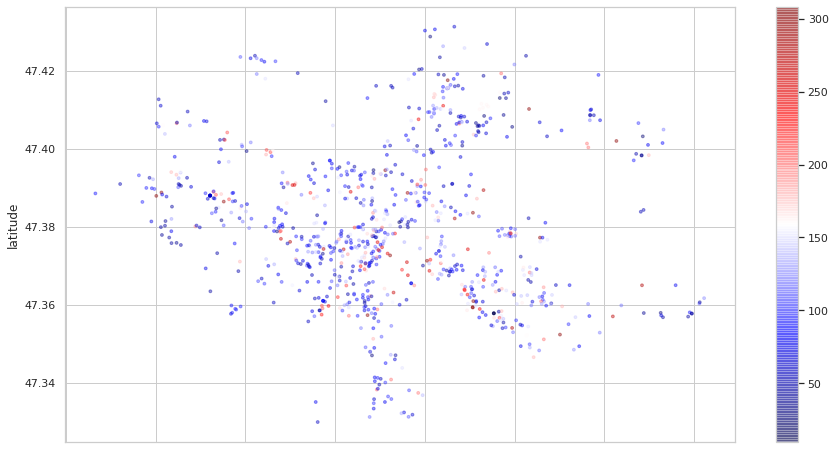

In [73]:
# plotar os imóveis pela latitude-longitude
zur_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=zur_clean['price'], s=8,
              cmap=plt.get_cmap('seismic'), figsize=(15,8));

No handles with labels found to put in legend.


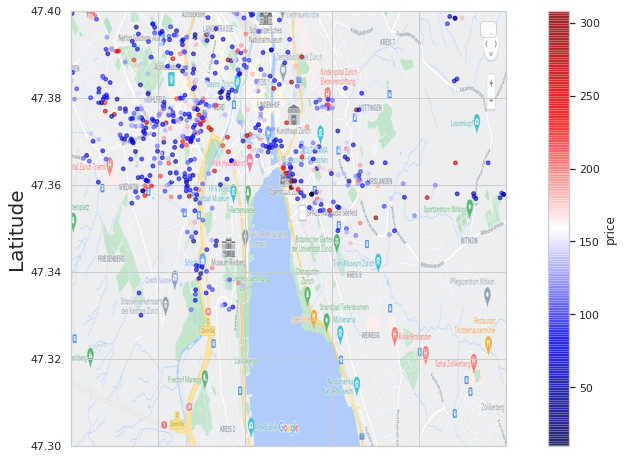

In [74]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imageio import imread
from matplotlib.pyplot import imshow

# import our image 
zurique_map = mpimg.imread('zurique.png')

# plot the data
ax = zur_clean.plot(kind="scatter", x="longitude", y="latitude", c="price", figsize=(15,8), 
                    cmap=plt.get_cmap("seismic"), s =15, colorbar=True, alpha=0.6)


# use our map with it's bounding coordinates
plt.imshow(zurique_map, extent=[8.50, 8.60, 47.30, 47.40], alpha=0.8)         

# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)

# set the min/max axis values - these must be the same as above
plt.legend(fontsize=20)
plt.ylim(47.30, 47.40)
plt.xlim(8.50, 8.60)
plt.show()

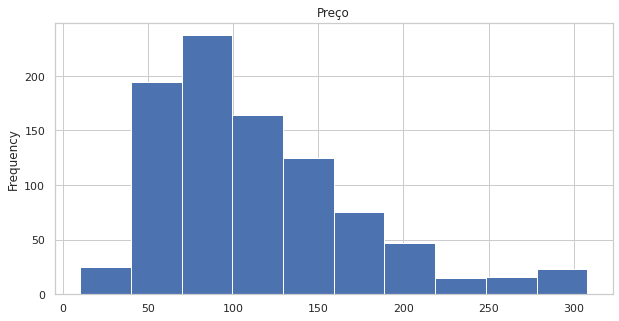

In [76]:
# histograma de lista de preços 

zur_clean.price.plot(title = 'Preço', kind = 'hist',figsize=(10,5))

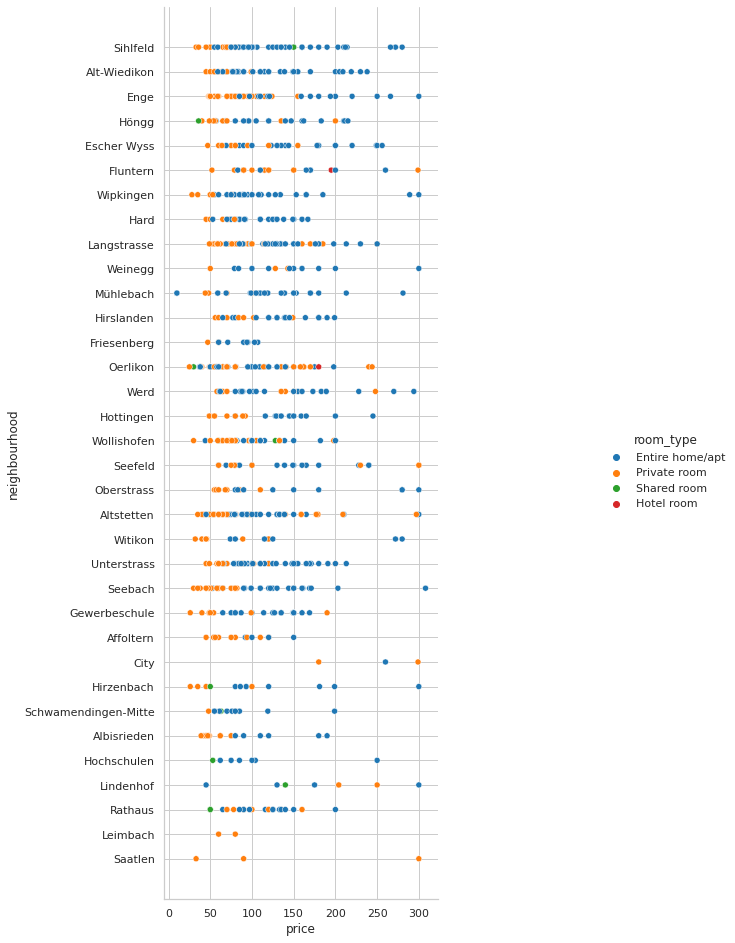

In [79]:
# gráfico mostrando os diferentes tipos de imóveis em cada bairro

g = sns.relplot(x="price", y="neighbourhood", hue="room_type", data=zur_clean, palette = 'tab10')
g.figure.set_size_inches(15, 15)


### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [80]:
# ver a média da coluna `minimum_nights`
zur_clean.minimum_nights.describe()

count    921.000000
mean       3.285559
std        2.261660
min        1.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       11.000000
Name: minimum_nights, dtype: float64

## Conclusões


Essa foi uma análise preliminar dos dados do Airbnb de Zurique para 8 de Outubro de 2021.
Essa análise de dados foi realizada a partir de um dataset simplificado, com poucos dados, permitindo poucas comparações. Após a limpeza dos dados e a retirada de alguns outliers que foram observados pode-se observar que...

Há presença de imóveis por toda a cidade com uma distribuição bem homogênea 

*   Algumas variáveis apresentam outliers que poderiam mudar a análise dos dados (price, minimum_nights, number_of_reviews);
*   A média de preço após a limpeza dos dados é de = 113.15 em Franco Suíço (680,04 em Reais);
*   A média de noites varia entre 1 no mínimo e 11 no máximo, com uma média de 3 dias;
*    Os 5 bairros mais caros são: City, Lindenhof, Seefeld, Weinegg e Saatlen;
*   Os 5 bairros mais baratos são: Leimbach, Albisrieden, Friesenberg,  Schwamendingen-Mitte e Affoltern;
*   A porcentagem dos tipos de imóveis mais alugados é: Entire home/apt =  58.6%, Private room = 39.6%, Shared room = 1.5% e Hotel room = 0.2% 

Com um dataset mais completo e o uso de machine learning poderíamos chegar à outras conclusões mais completas e mais interessantes.